In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set(style="ticks")
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, Normalizer

In [78]:
data = pd.read_csv("titanic.csv")

In [79]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [80]:
data.isnull().sum()
# проверим есть ли пропущенные значения

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [82]:
# обработка пропуска возраста
# mean_age = round(data['Age'].mean())
data['Age'].fillna(-1, inplace=True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [84]:
data['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [85]:
data['Cabin'].fillna('unknown', inplace=True)

In [86]:
data['Cabin'].unique()

array(['unknown', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78',
       'D34', 'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61',
       'C53', 'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46',
       'C116', 'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97',
       'D22', 'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34',
       'C62 C64', 'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21',
       'C89', 'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [87]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [88]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [89]:
# Кодируем признаки Pclass и Embarked в отдельные столбцы
data = pd.get_dummies(data, columns=['Pclass','Embarked'])

In [90]:
# Пол кодируем в 1/0
data['IsMale']=data.Sex.replace({'female':0,'male':1})
data.drop('Sex', axis = 1, inplace = True)

In [91]:
data.head(3)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,892,0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,unknown,0,0,1,0,1,0,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,unknown,0,0,1,0,0,1,0
2,894,0,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,unknown,0,1,0,0,1,0,1


In [92]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Age']])

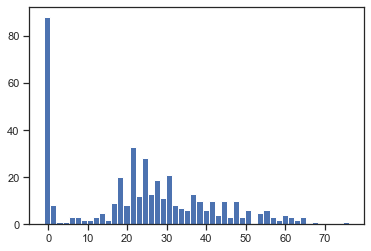

In [93]:
plt.hist(data['Age'], 50)
plt.show()

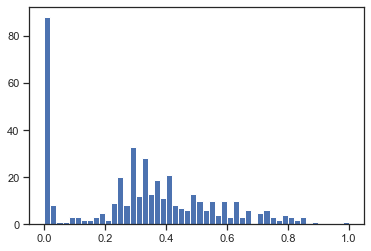

In [94]:
plt.hist(sc1_data, 50)
plt.show()

In [95]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Age']])

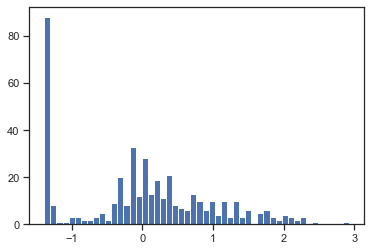

In [96]:
plt.hist(sc2_data, 50)
plt.show()